In [ ]:
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv("/Users/natashale/Desktop/NSBB552/drugs-data.csv")
df
df.describe()

,Drug-1,Drug-2,Drug-3
count,48.000000,48.000000,48.000000
mean,9.929167,8.602083,15.312500
std,2.779404,3.267082,3.183844
min,4.600000,5.300000,10.300000
25%,7.800000,6.475000,12.350000
50%,9.900000,7.650000,14.650000
75%,11.700000,8.800000,17.950000
max,17.900000,20.100000,21.200000


In [61]:
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import itertools as it

import scipy.stats as stats
import os

import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats

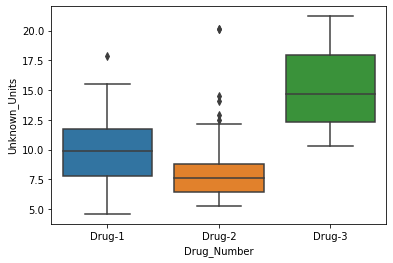

In [62]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Drug-1', 'Drug-2', 'Drug-3'])
df_melt.columns = ['index', 'Drug_Number', 'Unknown_Units']
ax = sns.boxplot(x='Drug_Number', y='Unknown_Units', data=df_melt)

In [63]:
fvalue, pvalue = stats.f_oneway(df['Drug-1'], df['Drug-2'], df['Drug-3'])
print(fvalue, pvalue)

63.7272627010607 1.925577585081492e-20


In [64]:
model = ols('Unknown_Units ~ C(Drug_Number)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Drug_Number),1212.337917,2.0,63.727263,1.925578e-20
Residual,1341.181458,141.0,NaN,NaN


In [66]:
#The p-value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we can conclude that there are significant differences among the different drugs.